In [352]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import seaborn as sns  # Importing Seaborn library for data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib library for creating plots

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error, mean_absolute_error  # Importing evaluation metrics from scikit-learn library


import warnings  # Importing warnings module to handle warnings
warnings.filterwarnings("ignore")  # Ignore warnings during runtime

plt.style.use('ggplot')  # Setting the plot style to 'ggplot'

In [353]:
df = pd.read_csv('daily-website-visitors.csv')  # Reading the CSV file into a DataFrame
# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Select specific columns from the DataFrame
df = df[['Day', 'Day.Of.Week', 'Page.Loads']]

# Display the DataFrame
print(df.head())

                  Day  Day.Of.Week Page.Loads
Date                                         
2014-09-14     Sunday            1      2,146
2014-09-15     Monday            2      3,621
2014-09-16    Tuesday            3      3,698
2014-09-17  Wednesday            4      3,667
2014-09-18   Thursday            5      3,316


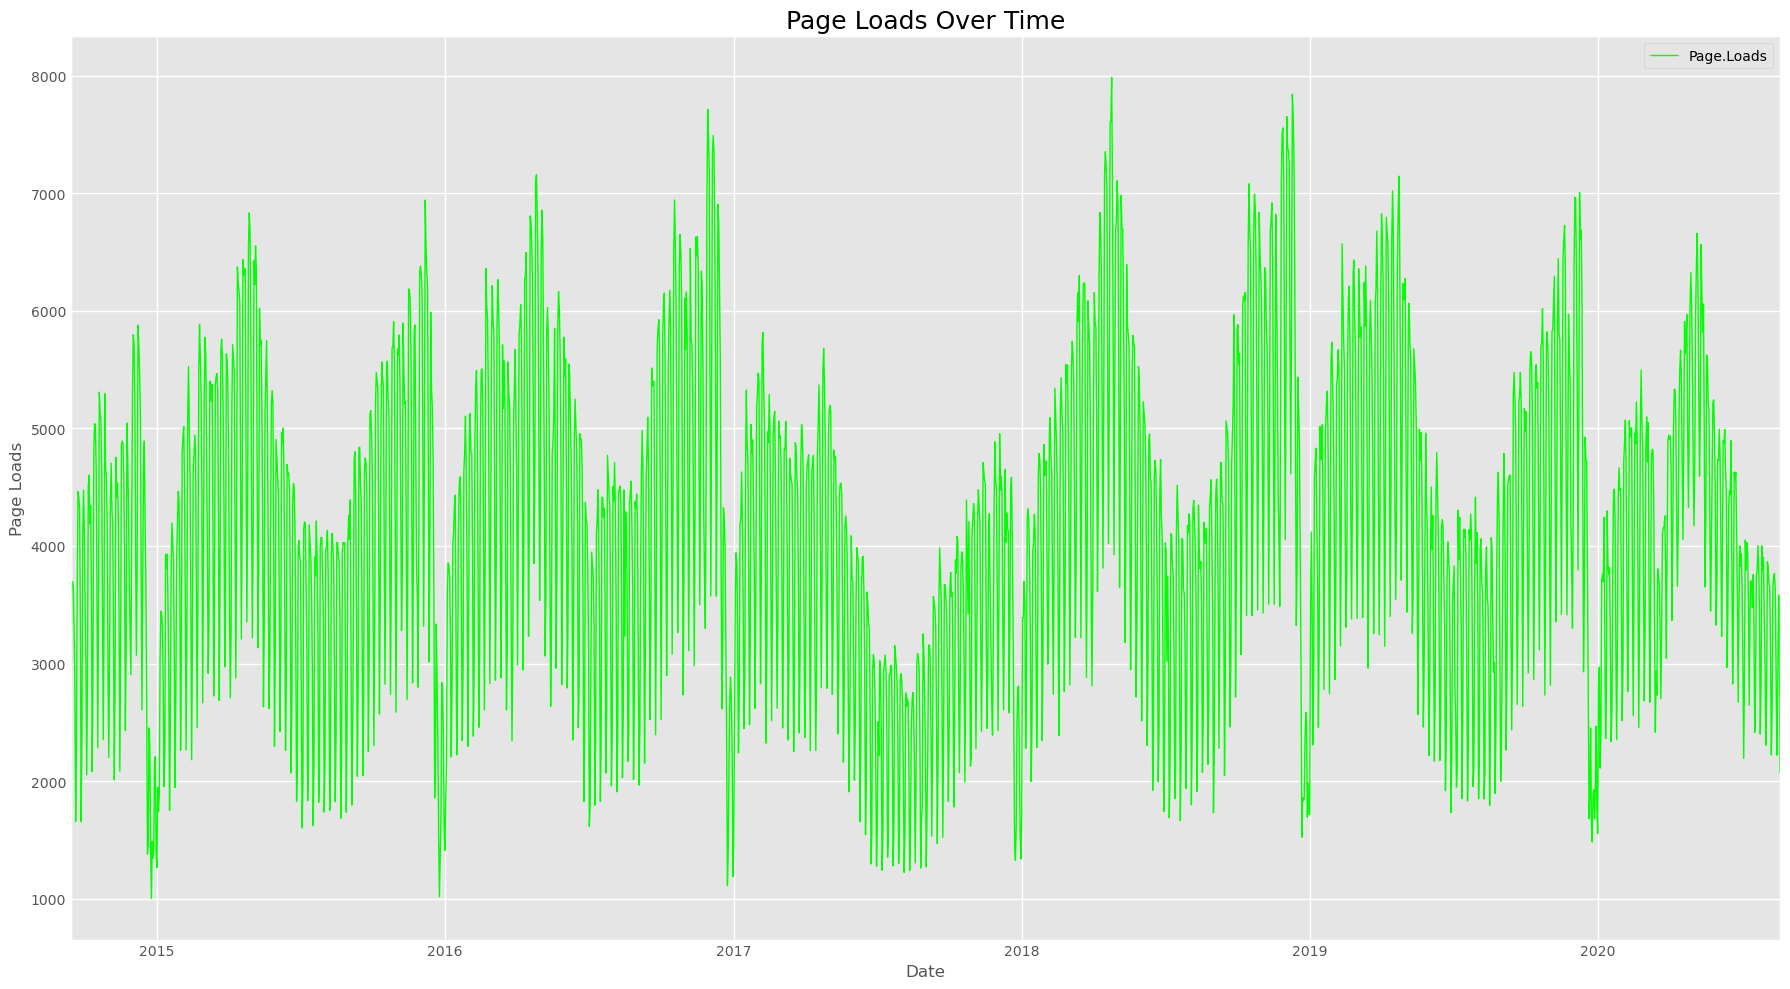

In [354]:
# Remove commas from the 'Page.Loads' column and convert it to numeric
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time
df.plot(y='Page.Loads', ax=ax, color="lime", linestyle="-", linewidth=1, markersize=8)

# Set the title of the plot
ax.set_title("Page Loads Over Time", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()

# Train and test split of the data

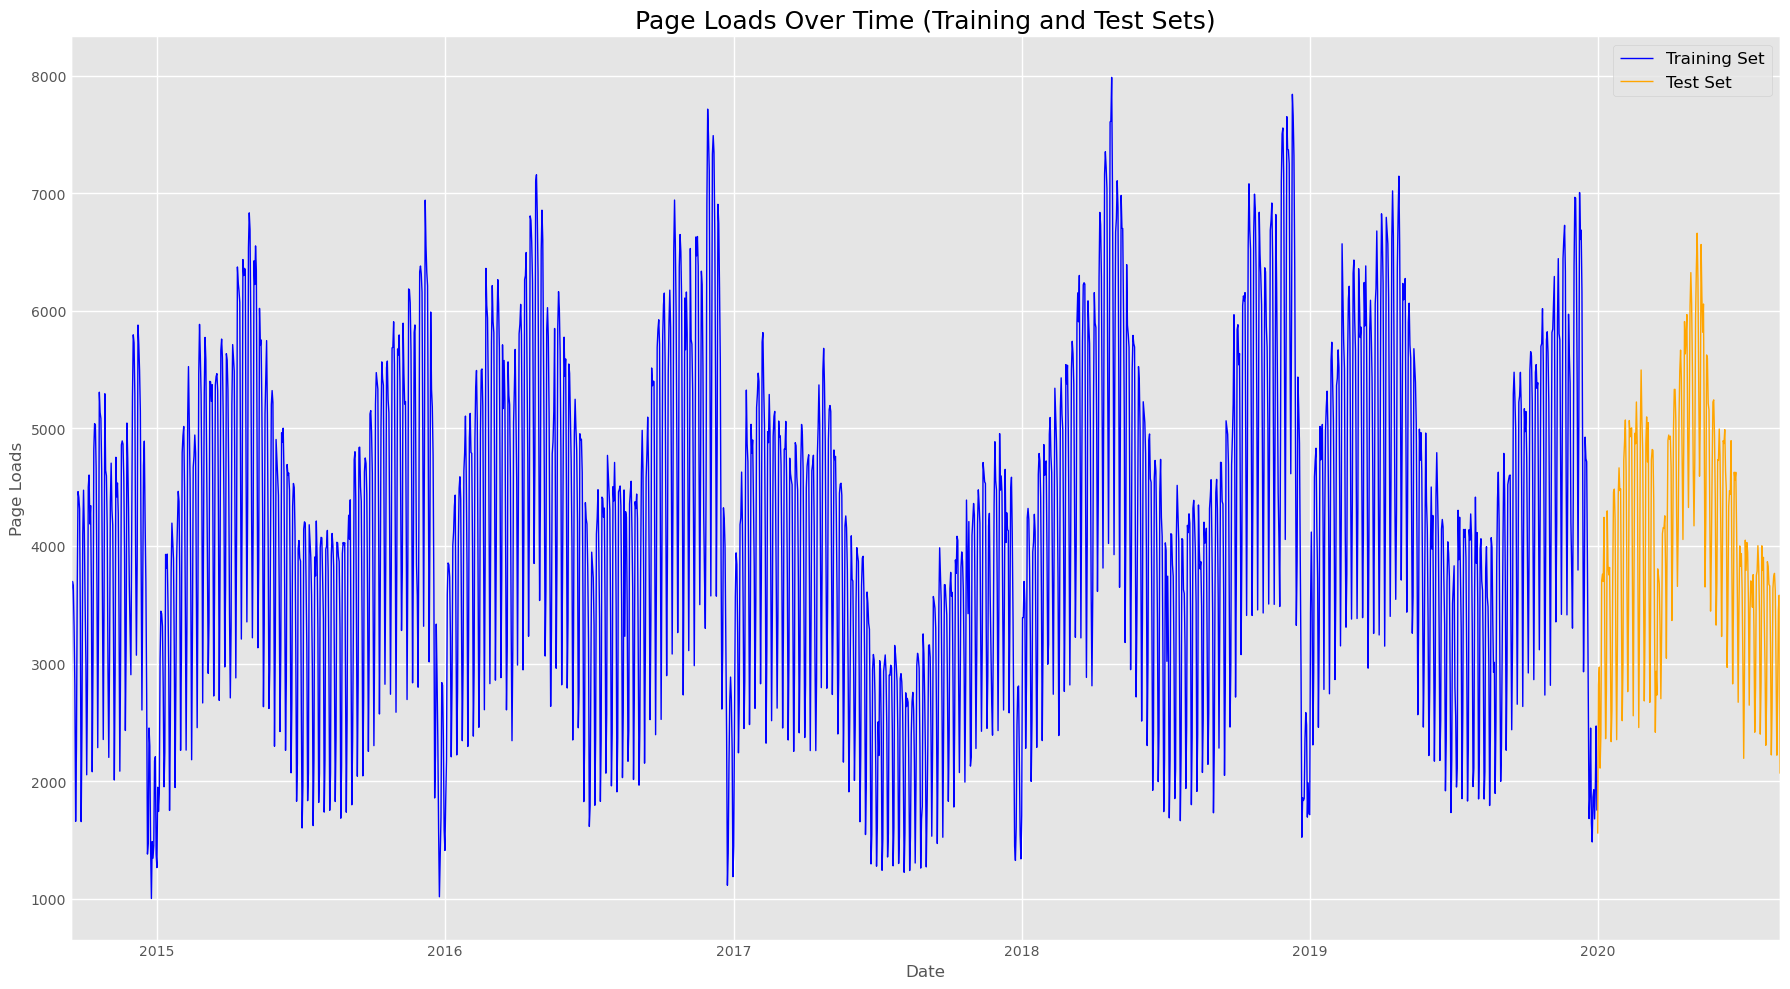

In [355]:
# Split the data into training and test sets
split_date = '2020-01-01'
train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

# Create a new figure and axis object for the plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot 'Page Loads' over time for training and test sets
train.plot(y='Page.Loads', ax=ax, color="blue", linestyle="-", linewidth=1, markersize=8, label='Training Set')
test.plot(y='Page.Loads', ax=ax, color="orange", linestyle="-", linewidth=1, markersize=8, label='Test Set')

# Set the title of the plot
ax.set_title("Page Loads Over Time (Training and Test Sets)", fontsize=18)

# Set the label for the x-axis
ax.set_xlabel("Date", fontsize=12)

# Set the label for the y-axis
ax.set_ylabel("Page Loads", fontsize=12)

# Add a legend to the plot
plt.legend(fontsize=12)

# Adjust the layout of the plot to prevent overlap of axis labels
fig.tight_layout()

# Display the plot
plt.show()


# Feature Creation 

In [356]:
def create_features(df):
    """
    Create time series features based on DataFrame columns.
    """
    df = df.copy()
    # Extract features based on 'Date' index
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

# Assuming your DataFrame is named 'selected_columns'
df_with_features = create_features(df)

# Visualize features 

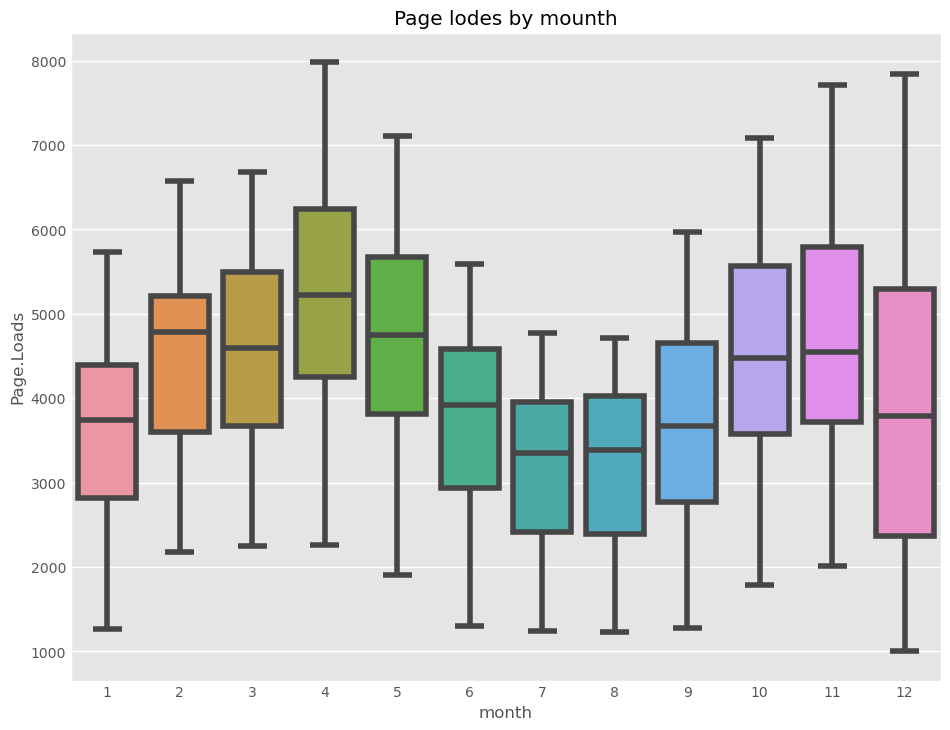

In [357]:
# Assuming your DataFrame is named 'df_with_features'
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_with_features, x='month', y='Page.Loads')
ax.set_title('Page lodes by mounth')
plt.show()

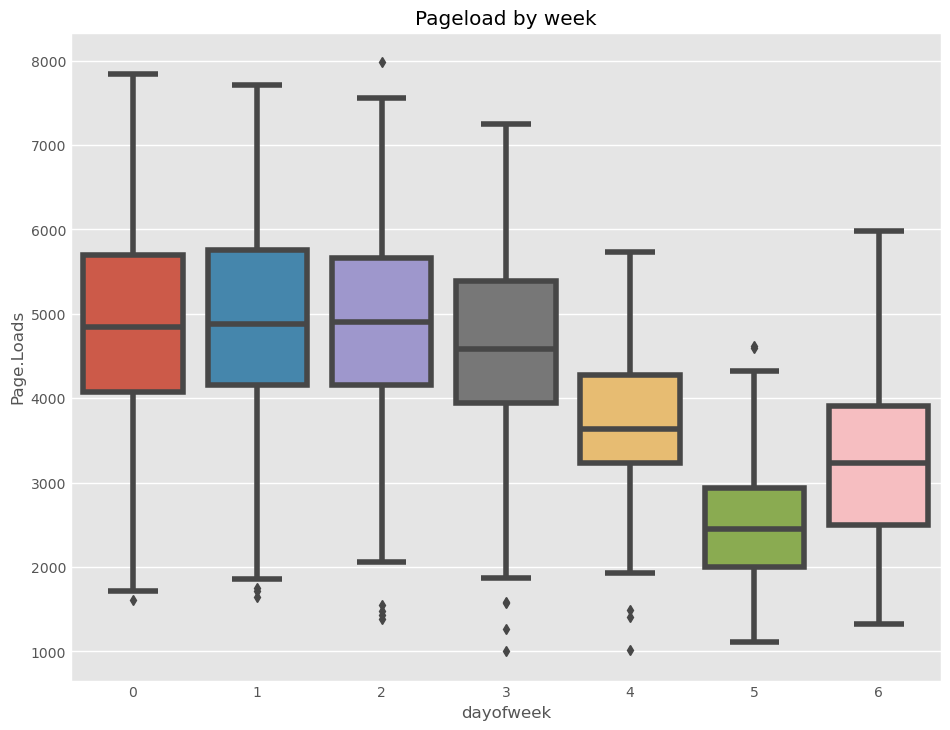

In [358]:
# Assuming your DataFrame is named 'df_with_features'
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_with_features, x='dayofweek', y='Page.Loads')
ax.set_title('Pageload by week')
plt.show()

# Model implementation 

In [359]:
print(train)


                  Day  Day.Of.Week  Page.Loads
Date                                          
2014-09-14     Sunday            1        2146
2014-09-15     Monday            2        3621
2014-09-16    Tuesday            3        3698
2014-09-17  Wednesday            4        3667
2014-09-18   Thursday            5        3316
...               ...          ...         ...
2019-12-27     Friday            6        1927
2019-12-28   Saturday            7        1679
2019-12-29     Sunday            1        1962
2019-12-30     Monday            2        2469
2019-12-31    Tuesday            3        1750

[1935 rows x 3 columns]


In [360]:
# Proceed with creating features
train = create_features(train)
test = create_features(test)

# Define features and target
# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'dayofmonth', 'weekofyear']
FEATURES = [ 'dayofweek', 'quarter', 'month', 'dayofmonth']

TARGET = 'Page.Loads'

# Extract features and target variables
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [361]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:4305.97129	validation_1-rmse:4163.57467
[100]	validation_0-rmse:1783.83860	validation_1-rmse:1592.12734
[200]	validation_0-rmse:999.00161	validation_1-rmse:815.95265
[300]	validation_0-rmse:782.60000	validation_1-rmse:663.40150
[400]	validation_0-rmse:702.20393	validation_1-rmse:638.91649
[500]	validation_0-rmse:665.09773	validation_1-rmse:629.31120
[600]	validation_0-rmse:648.49237	validation_1-rmse:627.49026
[700]	validation_0-rmse:637.15699	validation_1-rmse:626.24666
[800]	validation_0-rmse:629.68775	validation_1-rmse:624.35410
[900]	validation_0-rmse:623.07886	validation_1-rmse:622.35452
[980]	validation_0-rmse:619.05691	validation_1-rmse:622.56468


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Feature Importance

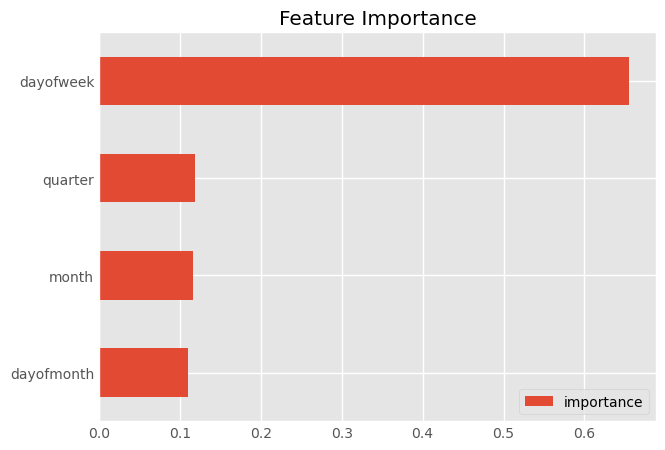

In [362]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

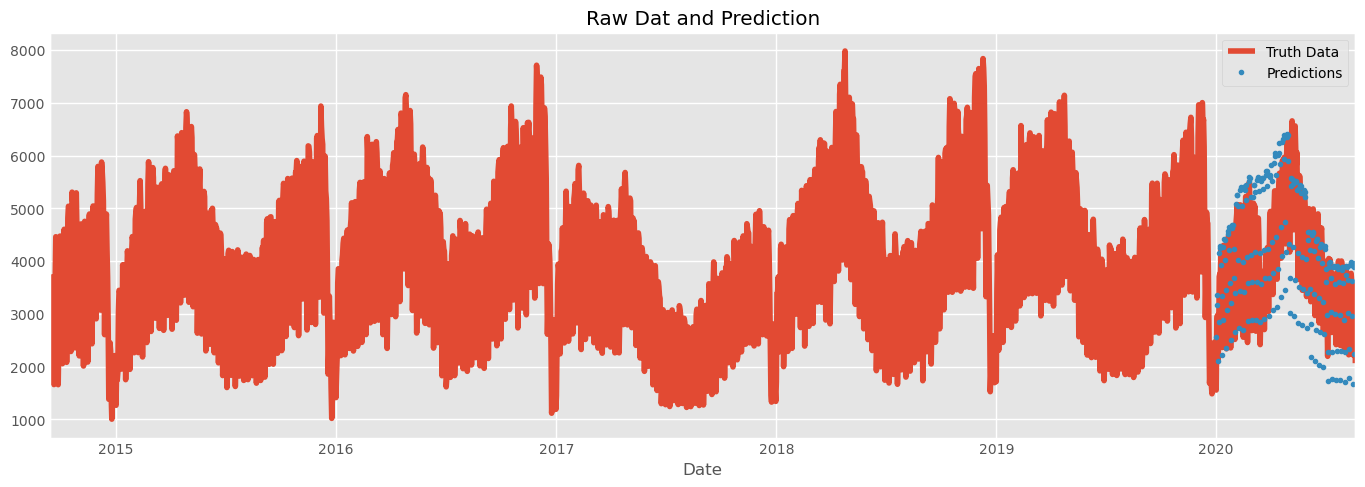

In [363]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Page.Loads']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

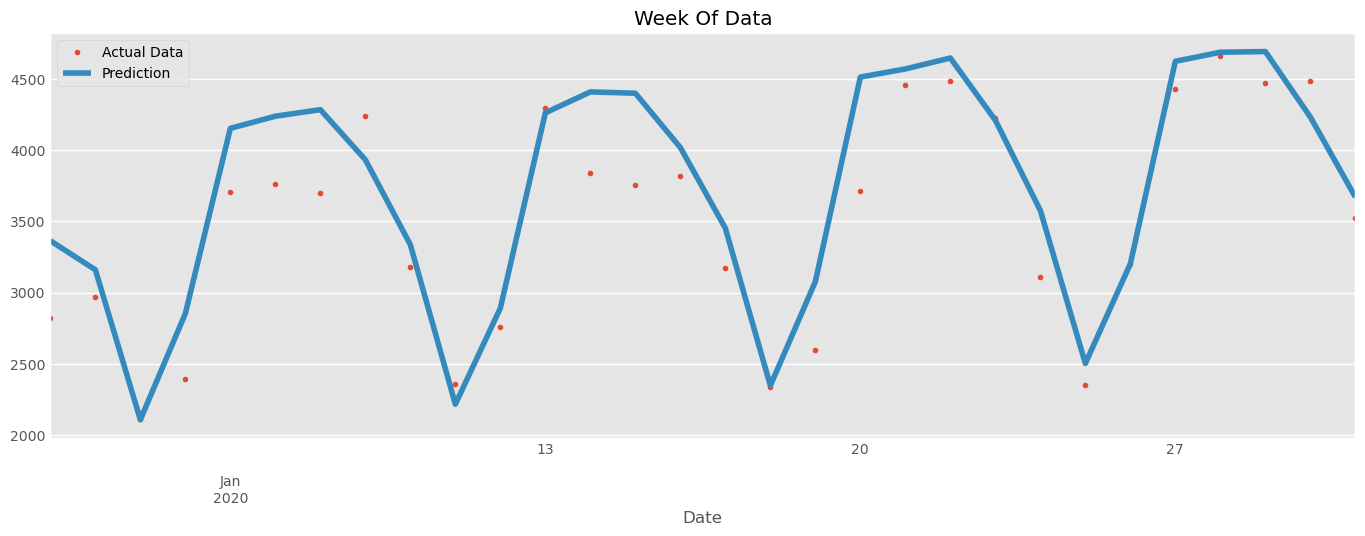

In [367]:
ax = df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]['Page.Loads'] \
    .plot(figsize=(15, 5), title='Week Of Data', style='.')
df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]['prediction'] \
    .plot(style='-')
plt.legend(['Actual Data','Prediction'])
plt.show()

In [366]:
# Filter the DataFrame for the specified period
period_data = df.loc[(df.index > '2020-01-01') & (df.index < '2020-02-01')]

# Extract the actual values and predictions for the specified period
actual_values = period_data['Page.Loads']
predictions = period_data['prediction']

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

# Print the results
print("Mean Squared Error (MSE):", np.sqrt(mse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 349.35541168828337
Mean Absolute Error (MAE): 274.16388346354165
Mean Absolute Percentage Error (MAPE): 8.13059040889254
